In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

%cd -q ../scripts/
from default_param import *

/usr/local/lib/python3.6/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


#  FLE


In this script the CONDENSATION is done for rightward and leftward motion of a dot stimulus, at different levels of noise. also for flashing stimuli needed for simulation of flash initiated and flash_terminated FLEs. 
The aim is to generate generate (Berry et al 99)'s figure 2: shifting RF position in the direction of motion.



In [2]:
%run experiment_fle.py

Sequence results/FLE-dot-anim.mp4 already exists (remove to recompute)
Studying CONDENSATION by changing image along variable(s) : {'latency': [0, 10]}
Studying CONDENSATION by changing image along variable(s) : {'latency': [0, 10]}
Sequence results/FLE-flash-anim.mp4 already exists (remove to recompute)
Studying CONDENSATION by changing image along variable(s) : {'latency': [0, 10]}
Studying CONDENSATION by changing image along variable(s) : {'latency': [0, 10]}


## movies

first each stimulus in isolation, then a merge of both stimuli with a slight gap.

In [3]:
latency = 10

for method in ['PBP', 'MBP']:
    for i, (stimulus_tag, cmap, color) in enumerate(zip(stim_labels, [plt.cm.Greens, plt.cm.Reds], ['g', 'r'])):
        figname = os.path.join('../figures/', method + '_' + stimulus_tag)
        particles = image[stimulus_tag]['result'][method][latency].copy() 
        mp.anim_save(z=None, filename=figname + '_spatial_readout', particles=particles, N_quant_X=N_quant_Y, N_quant_Y=N_quant_Y, fps=10)

Sequence ../figures/PBP_dot_spatial_readout.mp4 already exists (remove to recompute)
Sequence ../figures/PBP_flash_spatial_readout.mp4 already exists (remove to recompute)
Sequence ../figures/MBP_dot_spatial_readout.mp4 already exists (remove to recompute)
Sequence ../figures/MBP_flash_spatial_readout.mp4 already exists (remove to recompute)


In [4]:
for method in ['PBP', 'MBP']:
    figname = os.path.join('../figures/', method)
    particles_full = np.zeros((5, 0, mp.N_frame))
    for i, (stimulus_tag, cmap, color) in enumerate(zip(stim_labels, [plt.cm.Greens, plt.cm.Reds], ['g', 'r'])):
        particles = image[stimulus_tag]['result'][method][latency].copy()
        if stimulus_tag == 'flash':
            particles[1, ...] = mp.torus(particles[1, ...] - .1, mp.width)
        else:
            particles[1, ...] = mp.torus(particles[1, ...] + .1, mp.width)
        particles_full = np.concatenate((particles_full, particles), axis=1)
    particles_full = np.roll(particles_full, -latency, axis=-1)
    mp.anim_save(z=None, filename=figname + '_spatial_readout', particles=particles_full, N_quant_X=N_quant_Y, N_quant_Y=N_quant_Y, hue=False, fps=3)


Sequence ../figures/PBP_spatial_readout.mp4 already exists (remove to recompute)
Sequence ../figures/MBP_spatial_readout.mp4 already exists (remove to recompute)


In [5]:
!ffprobe -i ../figures/PBP_spatial_readout.mp4
!ffprobe -i ../figures/MBP_spatial_readout.mp4

ffprobe version 3.2.2 Copyright (c) 2007-2016 the FFmpeg developers
  built with Apple LLVM version 8.0.0 (clang-800.0.42.1)
  configuration: --prefix=/usr/local/Cellar/ffmpeg/3.2.2 --enable-shared --enable-pthreads --enable-gpl --enable-version3 --enable-hardcoded-tables --enable-avresample --cc=clang --host-cflags= --host-ldflags= --enable-libmp3lame --enable-libvorbis --enable-libvpx --enable-libx264 --enable-libxvid --enable-opencl --disable-lzma --enable-vda
  libavutil      55. 34.100 / 55. 34.100
  libavcodec     57. 64.101 / 57. 64.101
  libavformat    57. 56.100 / 57. 56.100
  libavdevice    57.  1.100 / 57.  1.100
  libavfilter     6. 65.100 /  6. 65.100
  libavresample   3.  1.  0 /  3.  1.  0
  libswscale      4.  2.100 /  4.  2.100
  libswresample   2.  3.100 /  2.  3.100
  libpostproc    54.  1.100 / 54.  1.100
Input #0, mov,mp4,m4a,3gp,3g2,mj2, from '../figures/PBP_spatial_readout.mp4':
  Metadata:
    major_brand     : isom
    minor_version   : 512
    compatible_brand

## stream plot

first each stimulus in isolation, then a merge of both stimuli with a slight gap.

In [6]:
latency = 10
time_ind_max_flash = 60

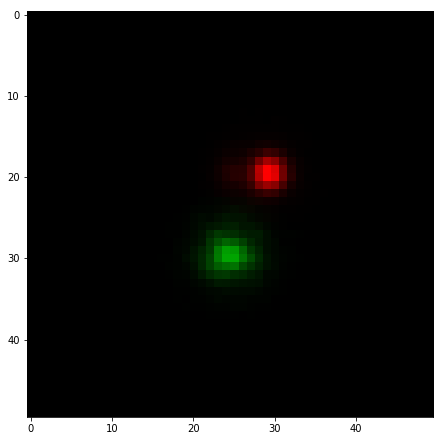

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width))
v_hist = np.zeros((N_quant_X, N_quant_Y, 3))

spatial_offset = 0.4

#time_ind_max_flash = 60
particles_full = np.zeros((5, 0, mp.N_frame))
for i, (stimulus_tag, cmap, color) in enumerate(zip(stim_labels, [plt.cm.Greens, plt.cm.Reds], ['g', 'r'])):
    particles = image[stimulus_tag]['result']['MBP'][latency].copy() 
    #print(i_frame)
    if stimulus_tag == 'flash':
        particles[1, ...] = mp.torus(particles[1, ...] + spatial_offset/2, mp.width)
    else:
        particles[1, ...] = mp.torus(particles[1, ...] - spatial_offset/2, mp.width)
    v_hist[:, :, i], x_edges, y_edges = mp.spatial_readout(particles[:, :, time_ind_max_flash], 
                                                        N_quant_X=N_quant_Y, N_quant_Y=N_quant_Y, display=False)
    particles_full = np.concatenate((particles_full, particles), axis=1)
particles_full = np.roll(particles_full, -latency, axis=-1)



#v_hist_max[:, :, i] -= v_hist_max[:, :, i].min() # HACK
#a.pcolor(x_edges, y_edges, v_hist_max[:, :, 0], vmin=0., vmax=v_hist_max[:, :, 0].max(), cmap=plt.cm.winter, edgecolor='k', alpha=.3)
#c= axA.pcolormesh(x_edges, y_edges, v_hist)#,         vmin=v_hist.min(), vmax=v_hist.max())#, edgecolor=(1, 1, 1, 1.), alpha=.8)#*i)#(1-i))
#c._is_stroked = False
v_hist /= v_hist.max()
c= ax.imshow(np.swapaxes(v_hist, 0, 1))#, vmin=v_hist.min(), vmax=v_hist.max(), edgecolor=(1, 1, 1, 1.), alpha=.8)#*i)#(1-i))

plt.tight_layout()
 
#for ext in FORMATS: fig.savefig(os.path.join('../figures/', 'FLE-A' + ext))

In [8]:
v_hist.max(), v_hist.min()

(1.0, 0.0)

In [9]:
particles = image['dot']['result']['MBP'][latency].copy() 

particles[1, ...] = mp.torus(particles[1, ...] - spatial_offset/2, mp.width)

particles = np.roll(particles, -latency, axis=-1)



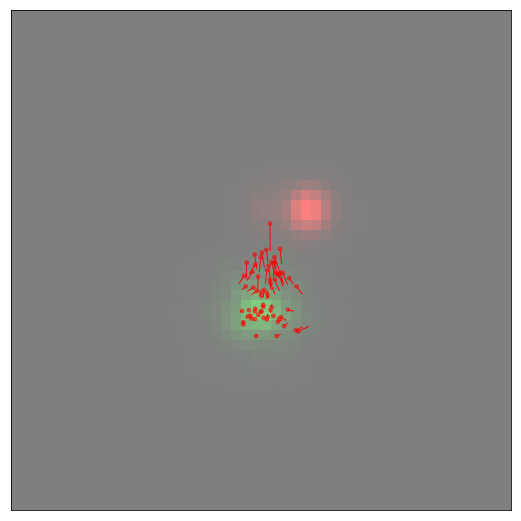

In [10]:
fig, ax, q = mp.show_particles(image=v_hist, particles=particles_full[:, :, 50], vmin=0, line_width=1., scale=.03, N_show=64, color_hue=False, inset=False)

-/!\ setting a color for a timed particle vector? thats strange...  [[1, 1.0, 1.0, 0.3], [1, 0.95833333333333337, 0.95833333333333337, 0.3], [1, 0.91666666666666663, 0.91666666666666663, 0.3], [1, 0.875, 0.875, 0.3], [1, 0.83333333333333337, 0.83333333333333337, 0.3], [1, 0.79166666666666674, 0.79166666666666674, 0.3], [1, 0.75, 0.75, 0.3], [1, 0.70833333333333337, 0.70833333333333337, 0.3], [1, 0.66666666666666674, 0.66666666666666674, 0.3], [1, 0.625, 0.625, 0.3], [1, 0.58333333333333337, 0.58333333333333337, 0.3], [1, 0.54166666666666674, 0.54166666666666674, 0.3], [1, 0.5, 0.5, 0.3], [1, 0.45833333333333337, 0.45833333333333337, 0.3], [1, 0.41666666666666674, 0.41666666666666674, 0.3], [1, 0.375, 0.375, 0.3], [1, 0.33333333333333337, 0.33333333333333337, 0.3], [1, 0.29166666666666674, 0.29166666666666674, 0.3], [1, 0.25, 0.25, 0.3], [1, 0.20833333333333337, 0.20833333333333337, 0.3], [1, 0.16666666666666674, 0.16666666666666674, 0.3], [1, 0.125, 0.125, 0.3], [1, 0.08333333333333337

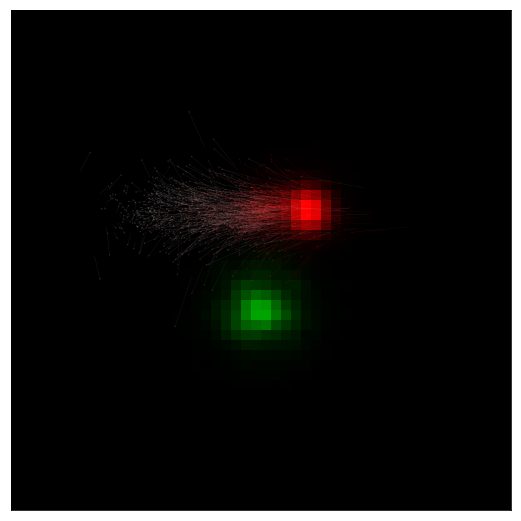

In [11]:
color, start, stop = [], 22, 47
for gray in np.linspace(1, 0, stop-start):
    color.append([1, gray, gray, 0.3])

fig, ax, q = mp.show_particles(image=v_hist/v_hist.max(), particles=particles[:, :, start:stop], vmin=-1, normalize= False, line_width=.15, scale=.04, 
                               N_show=64, color_hue=False, color=color)
for ext in FORMATS: fig.savefig(os.path.join('../figures/', 'coverart_raw' + ext))

## post-prod

In [12]:
import tikzmagic

In [13]:
!ls -l ../figures/coverart*

-rw-r--r--  1 laurentperrinet  staff   694222 Jan 23 12:41 ../figures/coverart.jpg
-rw-r--r--  1 laurentperrinet  staff   297939 Jan 23 12:41 ../figures/coverart.pdf
-rw-r--r--  1 laurentperrinet  staff  1219731 Jan 23 12:41 ../figures/coverart.png
-rw-r--r--  1 laurentperrinet  staff  7941024 Jan 23 12:41 ../figures/coverart.tiff
-rw-r--r--  1 laurentperrinet  staff   298002 Jan 23 12:46 ../figures/coverart_raw.pdf
-rw-r--r--  1 laurentperrinet  staff    41556 Jan 23 12:46 ../figures/coverart_raw.png


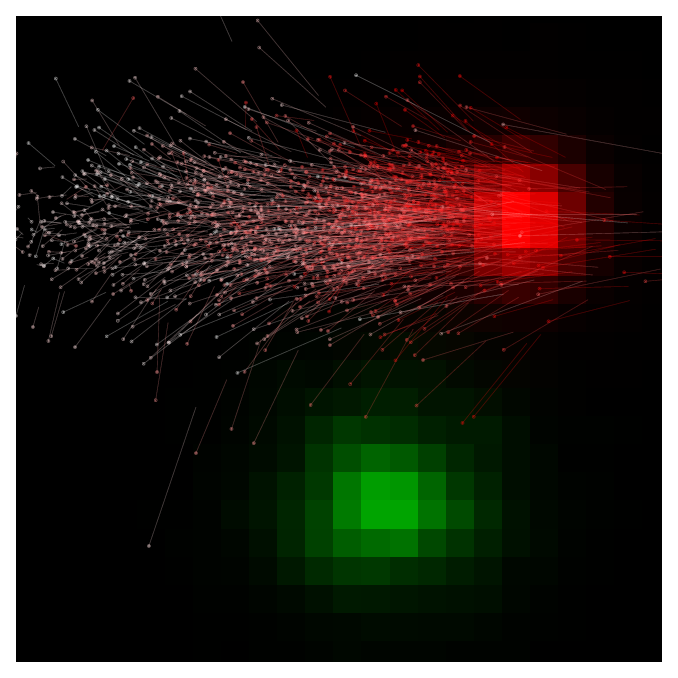

In [14]:
%%tikz -e ../figures/coverart.pdf

\clip (.25\textwidth, 0.3\textwidth) rectangle (.7\textwidth, .75\textwidth);
\draw [anchor=south west] (0, 0) node {\includegraphics[width=\textwidth]{../figures/coverart_raw.pdf}};



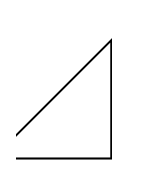

In [15]:
%%tikz

\clip (0.2,-0.1) rectangle (1.2,1.2);
\draw (0,0) -- (1,0) -- (1,1) -- cycle;
\draw (2,0) -- (3,0) -- (3,1) -- cycle;




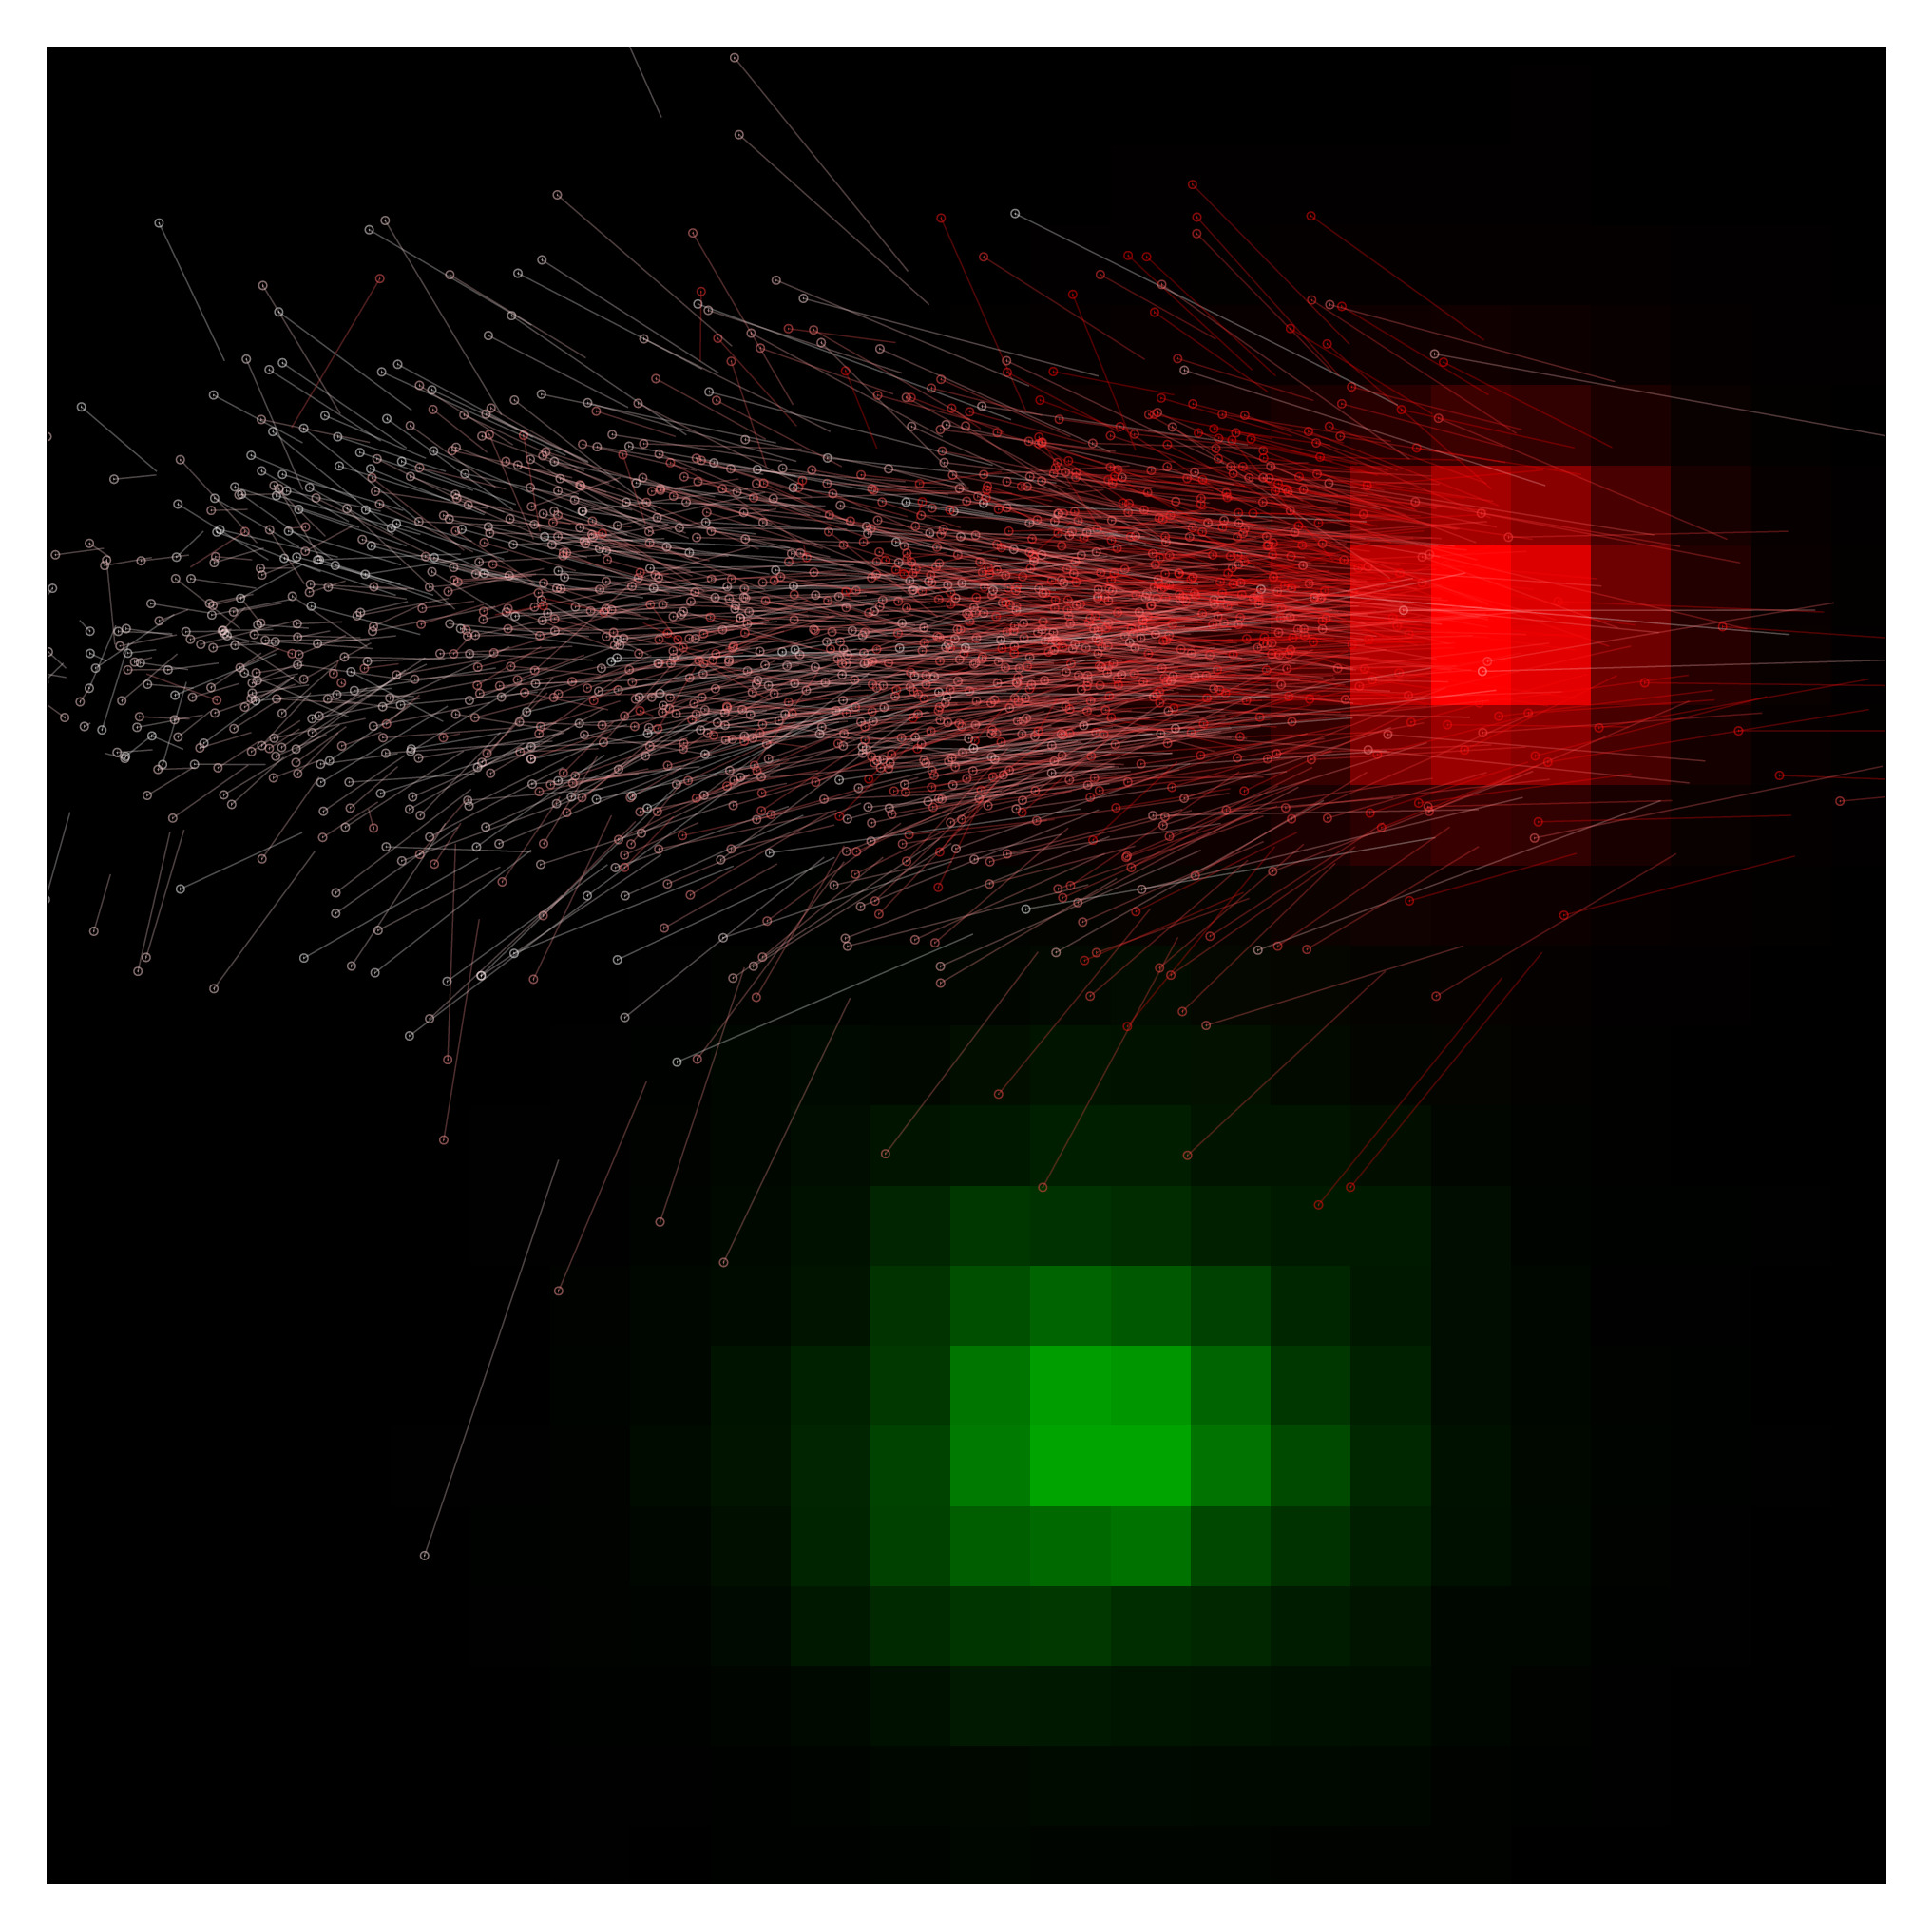

In [16]:
!convert  -density 900 ../figures/coverart.pdf ../figures/coverart.jpg
!convert  -density 900 ../figures/coverart.pdf ../figures/coverart.png
!convert  -density 600 -resize 5400  -units pixelsperinch -flatten  -compress lzw  -depth 8 ../figures/coverart.pdf ../figures/coverart.tiff

from IPython.display import SVG, Image
Image('../figures/coverart.jpg')

In [17]:
!echo "width=" ; convert ../figures/coverart.tiff -format "%[fx:w]" info:
!echo ", \nheight=" ; convert ../figures/coverart.tiff -format "%[fx:h]" info:
!echo ", \nunit=" ; convert ../figures/coverart.tiff -format "%U" info:

width=
5400, 
height=
5400, 
unit=
PixelsPerInch

In [18]:
!identify ../figures/coverart.tiff 

../figures/coverart.tiff TIFF 5400x5400 5400x5400+0+0 8-bit sRGB 7.941MB 0.000u 0:00.000


## version control

In [23]:
!git pull
!git add ../figures/MBP_spatial_readout.mp4
#!git add ../figures/coverart* ../notebooks/figure_coverart.ipynb
!git status

Already up-to-date.
On branch master
Your branch is ahead of 'origin/master' by 6 commits.
  (use "git push" to publish your local commits)
Changes to be committed:
  (use "git reset HEAD <file>..." to unstage)

	new file:   ../figures/MBP_spatial_readout.mp4

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)

	modified:   ../figures/FLE-A.pdf
	modified:   ../figures/FLE_limit_cycles.pdf
	modified:   ../figures/FLE_limit_cycles_raw.pdf
	modified:   ../notebooks/0_default parameters.ipynb
	modified:   ../notebooks/control_jobs_locally.ipynb
	modified:   ../notebooks/figure_1_FLE_cartoon.ipynb
	modified:   ../notebooks/figure_3_FLE.ipynb
	modified:   ../notebooks/figure_coverart.ipynb
	modified:   ../notebooks/version_control.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)

	../coverart/
	../notebooks/SI_controls.ipynb~HEAD
	../not

In [20]:
!git commit -m' figure coverart : adding files '  ../khoei17fle.tex ../notebooks/figure_coverart.ipynb ../figures/coverart* 
!#git push

[master 449f40d]  figure coverart : adding files
 4 files changed, 638 insertions(+), 819 deletions(-)
 rewrite notebooks/figure_coverart.ipynb (98%)
